In [8]:
import pandas as pd
import heapq
import numpy as np
import sklearn as sk
import folium
import time
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from numpy.core.multiarray import ndarray
from scipy.cluster.hierarchy import *
import scipy.spatial.distance as ssd
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [9]:
filename = "quake.csv"
X = np.genfromtxt(filename, delimiter=',', skip_header=False)
# print(X)
data = X[1:, 0]
data2 = X[1:, 3]
array_ = []
array2_ = []
for i in range(len(data)):
    array_ += [str(data[i])]
    array2_ += [str(data2[i])]
# print(array_)
# print(array2_)

In [10]:
X = X[1:, 1:3]
np.savetxt("X.csv", X, delimiter=',', fmt='%.2f')
print("Наши данные:\n", X, "\n")

Наши данные:
 [[-52.26  28.3 ]
 [ 45.53 150.93]
 [ 41.85 142.78]
 ...
 [ 27.87 139.51]
 [ 36.43 140.98]
 [ 24.02 122.23]] 



In [11]:
our_data = np.genfromtxt(filename, delimiter=',', skip_header=False)
our_data = our_data[1:, 1:3]
# print(our_data)
for i in range(len(our_data)):
    if our_data[i, 1] < 0:
        our_data[i, 1] += 360
np.savetxt("our_data.csv", our_data, delimiter=',', fmt='%.2f')

In [12]:
Y = list(range(1, len(X)+1))
# np.savetxt("Y.csv", Y, delimiter=',', fmt='%.f')
A = np.array(Y)

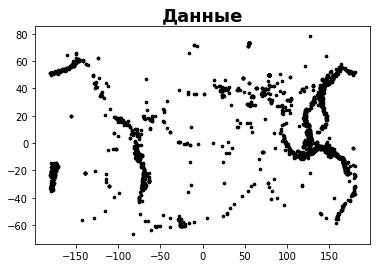

In [13]:
# широта
f_y = X[:, 0]
# долгота
f_x = X[:, 1]
plt.scatter(f_x, f_y, c='black', s=7)
plt.title('Данные', fontsize=18, fontweight='demi')
plt.show()

In [14]:
colors_ = ['red', 'blue', 'gray', 'darkred', 'lightred', 'orange', 'beige', 'green', 'darkgreen', 'lightgreen', 'darkblue', 'lightblue', 'purple', 'darkpurple', 'pink', 'cadetblue', 'lightgray', 'black']

m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
for i in range(len(X)):
    folium.Marker([f_y[i], f_x[i]], popup=folium.Popup('Глубина:' + array_[i] + '\n' + 'Сила землетрясения:' + array2_[i])).add_to(m)
m.save('mymap.html')

K-Means

K-Means:


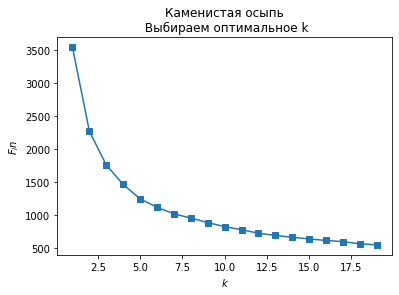

In [15]:
print("K-Means:")

# Метод локтя(каменистая осыпь)-ищем оптимальное k
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(our_data)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 20), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$F_in$')
plt.title('Каменистая осыпь\n Выбираем оптимальное k')
plt.show()
#

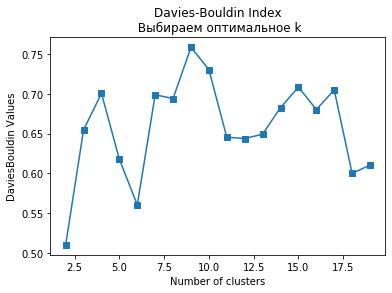

In [16]:
# Davies-Bouldin Index, Silhouette Coefficient
index = []
#siluet = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(our_data)
    index.append(davies_bouldin_score(our_data, kmeans.labels_))
    #siluet.append(metrics.silhouette_score(our_data, kmeans.labels_, metric='euclidean'))
plt.plot(range(2, 20), index, marker='s')
plt.xlabel('Number of clusters')
plt.ylabel('DaviesBouldin Values')
plt.title('Davies-Bouldin Index\n Выбираем оптимальное k')
plt.show()

In [17]:
k = 12
# Initializing KMeans
model = KMeans(n_clusters=12, random_state=1)
# Fitting the input data
model = model.fit(our_data)

In [18]:
# Predicting the clusters/Getting the cluster labels
all_predictions = model.predict(our_data)
np.savetxt("K-Means.csv", all_predictions, delimiter=',', fmt='%.f')
print("Метки кластеров:\n", all_predictions, "\n")
# Centroid values
centroids = model.cluster_centers_
print("Центры кластеров:\n", centroids, "\n")

Метки кластеров:
 [7 3 3 ... 3 3 4] 

Центры кластеров:
 [[-23.79462963 285.77771605]
 [ -7.76672176 154.62801653]
 [ 44.73016304  75.04798913]
 [ 40.24920118 144.61002959]
 [  2.60354115 121.71670823]
 [ 12.54472222 269.86277778]
 [ 53.27675676 196.86418919]
 [-26.91774194  55.86290323]
 [-57.22754717 330.41283019]
 [ 20.56878049 325.34317073]
 [-25.80848057 180.02805654]
 [ 33.71030303  33.20318182]] 



In [19]:
centroids_x = centroids[:, 1]
centroids_y = centroids[:, 0]
# plt.scatter(f_x, f_y, c='#050505', s=7)
# plt.scatter(centroids_x, centroids_y, marker='*', s=200, c='g')
# plt.title('Центры кластеров с K-Means', fontsize=18, fontweight='demi')
# plt.show()
colors_2 = ['red', 'blue', 'gray', 'orange', 'yellow', 'lime', 'green', 'purple', 'pink', 'lightgreen', 'darkblue',
            'lightblue', 'cadetblue', 'darkgreen']
colors_3 = ['red', 'blue', 'orange', 'yellow', 'lime', 'green', 'purple', 'pink', 'darkblue', 'palevioletred',
            'skyblue', 'goldenrod', 'firebrick', 'lightsalmon', 'gold', 'teal', 'gray']

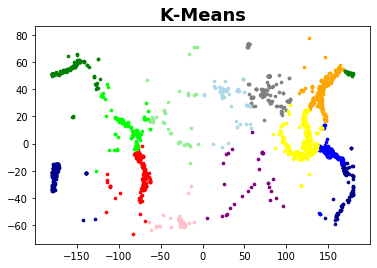

In [20]:
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if all_predictions[j] == i])
    ax.scatter(points[:, 1], points[:, 0], s=7, c=colors_2[i])
# np.savetxt("Points.csv", points, delimiter=',', fmt='%.2f')
# ax.scatter(centroids_x, centroids_y, marker='*', s=100, c='#050505')
plt.title('K-Means', fontsize=18, fontweight='demi')
plt.show()

In [21]:
m2 = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if all_predictions[j] == i])
    array_depth = np.array([array_[j] for j in range(len(X)) if all_predictions[j] == i])
    array_force = np.array([array2_[j] for j in range(len(X)) if all_predictions[j] == i])
    for l in range(len(points)):
        folium.Marker([points[l, 0], points[l, 1]], popup=folium.Popup('Глубина:' + array_depth[l] + '\n' + 'Сила землетрясения:' + array_force[l]), icon=folium.Icon(color=colors_[i])).add_to(m2)
m2.save('K_Means_map.html')
# end K-Means

# DBSCAN

In [23]:
print("DBSCAN:")
# для старых данных
# 30,40-3/50,100-2/20,50-4/20,40-5/16,35-6, но точек больше захватывает/16,37-7, но меньше точек
# 20,20/25,45-5 лучшие
# для новых данных
# 25,45-3-норм/16,35-4-много/16,37-5-много/
db = DBSCAN(eps=25, min_samples=45).fit(our_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
np.savetxt("DBSCAN.csv", labels, delimiter=',', fmt='%.f')
print("Метки кластеров:\n", labels, "\n")
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Число кластеров:', n_clusters_, "\n")

DBSCAN:
Метки кластеров:
 [-1  0  0 ...  0  0  0] 

Число кластеров: 3 



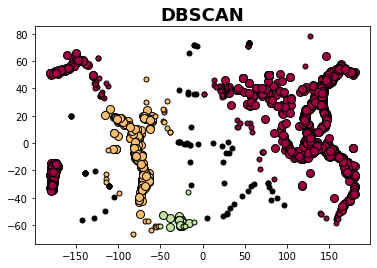

In [24]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

# plt.title('Число кластеров в DBSCAN: %d' % n_clusters_, fontsize=18, fontweight='demi')
plt.title('DBSCAN', fontsize=18, fontweight='demi')
plt.show()

In [25]:
m3 = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
for i in range(n_clusters_):
    points_ = np.array([X[j] for j in range(len(X)) if labels[j] == i])
    array_depth_ = np.array([array_[j] for j in range(len(X)) if labels[j] == i])
    array_force_ = np.array([array2_[j] for j in range(len(X)) if labels[j] == i])
    for l in range(len(points_)):
        folium.Marker([points_[l, 0], points_[l, 1]], popup=folium.Popup('Глубина:' + array_depth_[l] + '\n' + 'Сила землетрясения:' + array_force_[l]), icon=folium.Icon(color=colors_[i])).add_to(m3)
for j in range(len(X)):
    if labels[j] == -1:
        points_2 = np.array([X[j]])
    for l in range(len(points_2)):
        folium.Marker([points_2[l, 0], points_2[l, 1]], popup=folium.Popup('Это Выброс!'), icon=folium.Icon(color='black')).add_to(m3)
m3.save('DBSCAN_map.html')
# end DBSCAN

# Hierarchical clustering

Hierarchical clustering:


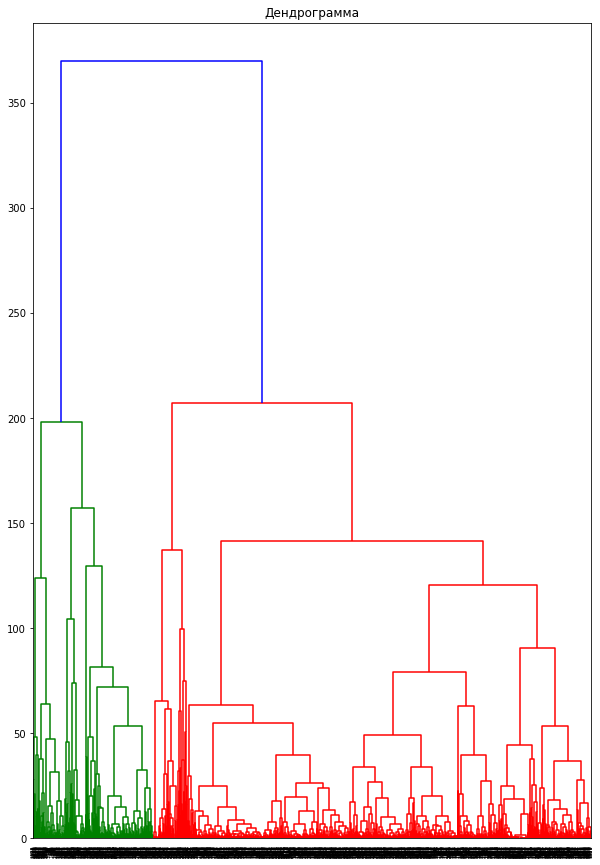

In [26]:
print("Hierarchical clustering:")
data_dist = pdist(our_data, 'euclidean')
# 'euclidean'/'chebyshev'/'minkowski', p=2./'cityblock'
np.savetxt("Distance.csv", data_dist, delimiter=',', fmt='%.f')
# print(data_dist)
data_linkage = linkage(data_dist, method='complete')
# method = 'centroid'- if 'euclidean'
# method = 'median'- if 'euclidean'
# method = 'single'
# method = 'complete'
# method = 'average'
# method = 'weighted'
# method = 'ward'- if 'euclidean'
np.savetxt("Data_linkage.csv", data_linkage, delimiter=',', fmt='%.f')
fig = plt.figure(figsize=(10, 15))
dendrogram(data_linkage)
plt.title('Дендрограмма')
plt.show()

# print(data_linkage)

In [27]:
#вариант 2 метод локтя(каменистая осыпь)
def wgss(data, groups):
# Within groups sum of squares (wgss)
#     Сумма квадратов расстояний от центроида до каждой точки данных
#     в многомерном пространстве.

    _data = np.array(data)
    res = 0.0
    for cluster in groups:
        inclust = _data[np.array(groups) == cluster]
        meanval = np.mean(inclust, axis=0)
        res += np.sum((inclust - meanval) ** 2)
    return res


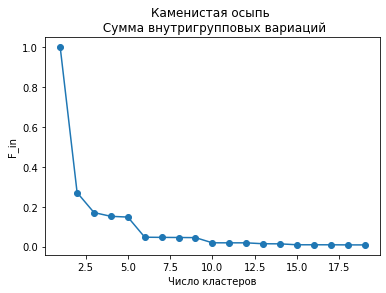

In [28]:
# -------------- Elbow method (метод локтя) -------------------------
elbow = [np.nan, wgss(our_data, [1]*len(our_data[:, 1]))]
for k in range(2, 20):
    groups = fcluster(data_linkage, k, criterion='maxclust')
    elbow.append(wgss(our_data, groups))
elbow = np.array(elbow)
plt.plot(elbow/np.nanmax(elbow), 'o', ls='solid')
plt.title('Каменистая осыпь \n Сумма внутригрупповых вариаций')
plt.xlabel('Число кластеров')
plt.ylabel('F_in')
plt.show()

In [29]:
n = 10
clustering = AgglomerativeClustering(n_clusters=n).fit(our_data)
groups = clustering.labels_
np.savetxt("Hierarchical clustering.csv", groups, delimiter=',', fmt='%.f')
print("Метки кластеров:\n", groups, "\n")

Метки кластеров:
 [0 3 3 ... 3 3 3] 



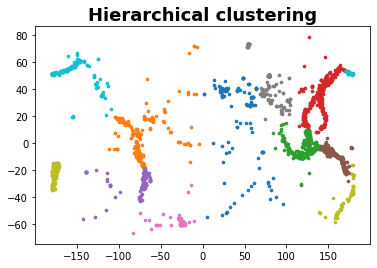

In [30]:
fig, ax_ = plt.subplots()
for i in range(n):
    pointss_X = np.array([X[j, 1] for j in range(len(X)) if groups[j] == i])
    pointss_Y = np.array([X[j, 0] for j in range(len(X)) if groups[j] == i])
    ax_.scatter(pointss_X, pointss_Y, s=7)
plt.title('Hierarchical clustering', fontsize=18, fontweight='demi')
plt.show()

In [31]:
m4 = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
for i in range(n):
    pointss_X = np.array([X[j, 1] for j in range(len(X)) if groups[j] == i])
    pointss_Y = np.array([X[j, 0] for j in range(len(X)) if groups[j] == i])
    depth = np.array([array_[j] for j in range(len(X)) if groups[j] == i])
    force = np.array([array2_[j] for j in range(len(X)) if groups[j] == i])
    for l in range(len(pointss_X)):
        folium.Marker([pointss_Y[l], pointss_X[l]], popup=folium.Popup('Глубина:' + depth[l] + '\n' + 'Сила землетрясения:' + force[l]), icon=folium.Icon(color=colors_[i])).add_to(m4)
m4.save('Hierarchical_map.html')
# end Hierarchical clustering

# Метрики качества кластеризации
# Силуэт
'''Данная величина лежит в диапазоне . Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям,
значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга,
значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам. 
Таким образом, чем больше силуэт, тем более четко выделены кластеры,
и они представляют собой компактные, плотно сгруппированные облака точек.'''

In [32]:
algorithms = []
algorithms.append(KMeans(n_clusters=12, random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(DBSCAN(eps=25, min_samples=45))
information = []
for algo in algorithms:
    algo.fit(our_data)
    information.append(({
        'Silhouette Coefficient': metrics.silhouette_score(our_data, algo.labels_)}))

results = pd.DataFrame(data=information, columns=[
                                           'Silhouette Coefficient'],
                       index=['K-means', 'Hierarchical', 'DBSCAN'])
print(results)

              Silhouette Coefficient
K-means                     0.518154
Hierarchical                0.469678
DBSCAN                      0.501839
